**THIS NOTEOOK TAKE YOU THROUGH THE PROBLEM STATEMENT OF VIDEO CLASSIFICATION PROBLEM IDENTIFING WHETHER VIDEO IS VIOLENT OR NOT**

##**IMPORTING LIBRARIES NEEDED FOR LOADING AND PREPROCESSING DATASET**

In [ ]:
import os
import numpy as np  , matplotlib.pyplot as m , pandas as pd

## **Loading Video FILES AND CREATING A DATAFRAME**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/DatasetVid"

In [ ]:
df = pd.DataFrame()

In [ ]:
df["Name_non"] = os.listdir(path+"/non")

In [ ]:
df["class"] = "NON_VIO"

In [ ]:
loc_non_list = []
for fn in df["Name_non"]:
  location = path+"/non/"+fn
  loc_non_list.append(location)

In [ ]:
df["location"]=loc_non_list

In [ ]:
newdf = pd.DataFrame()
newdf["Name_non"] = os.listdir(path+"/Voi")
newdf["class"] = "Voi"
loc_voi_list = []
for fn in newdf["Name_non"]:
  location = path+"/Voi/"+fn
  loc_voi_list.append(location)

In [ ]:
newdf["location"]=loc_voi_list

In [ ]:
Combined = pd.concat([df,newdf], ignore_index=True)

In [ ]:
Combined.head(10)

,Name_non,class,location
0,NV_10.mp4,NON_VIO,/content/drive/MyDrive/DatasetVid/non/NV_10.mp4
1,NV_1.mp4,NON_VIO,/content/drive/MyDrive/DatasetVid/non/NV_1.mp4
2,NV_1000.mp4,NON_VIO,/content/drive/MyDrive/DatasetVid/non/NV_1000.mp4
3,NV_12.mp4,NON_VIO,/content/drive/MyDrive/DatasetVid/non/NV_12.mp4
4,NV_11.mp4,NON_VIO,/content/drive/MyDrive/DatasetVid/non/NV_11.mp4
5,NV_15.mp4,NON_VIO,/content/drive/MyDrive/DatasetVid/non/NV_15.mp4
6,NV_14.mp4,NON_VIO,/content/drive/MyDrive/DatasetVid/non/NV_14.mp4
7,NV_13.mp4,NON_VIO,/content/drive/MyDrive/DatasetVid/non/NV_13.mp4
8,NV_17.mp4,NON_VIO,/content/drive/MyDrive/DatasetVid/non/NV_17.mp4
9,NV_16.mp4,NON_VIO,/content/drive/MyDrive/DatasetVid/non/NV_16.mp4


In [ ]:
Combined.tail(10)

,Name_non,class,location
507,V_975.mp4,Voi,/content/drive/MyDrive/DatasetVid/Voi/V_975.mp4
508,V_967.mp4,Voi,/content/drive/MyDrive/DatasetVid/Voi/V_967.mp4
509,V_995.mp4,Voi,/content/drive/MyDrive/DatasetVid/Voi/V_995.mp4
510,V_991.mp4,Voi,/content/drive/MyDrive/DatasetVid/Voi/V_991.mp4
511,V_990.mp4,Voi,/content/drive/MyDrive/DatasetVid/Voi/V_990.mp4
512,V_993.mp4,Voi,/content/drive/MyDrive/DatasetVid/Voi/V_993.mp4
513,V_992.mp4,Voi,/content/drive/MyDrive/DatasetVid/Voi/V_992.mp4
514,V_994.mp4,Voi,/content/drive/MyDrive/DatasetVid/Voi/V_994.mp4
515,V_996.mp4,Voi,/content/drive/MyDrive/DatasetVid/Voi/V_996.mp4
516,V_997.mp4,Voi,/content/drive/MyDrive/DatasetVid/Voi/V_997.mp4


##**DATA EXPLORATION**

* **TO EXPLORE DATA WE NEED TO IMPORT NECESSARY LIBRARIES**







In [ ]:
import cv2

###**NO USEFULL INFORMATION COULD BE DERIVED BY USING DESCRIBE FNCTION BUT WE CAN SEE THAT THERE IS NO CLASS IMBALANCE**

In [ ]:
Combined.describe()

,Name_non,class,location
count,517,517,517
unique,517,2,517
top,NV_10.mp4,Voi,/content/drive/MyDrive/DatasetVid/non/NV_10.mp4
freq,1,319,1


###**SO WE NEED TO CALCULATE AVERAGE FPS , AVERAGE TIME ,AVERAGE  NUMBER OF FRAMES PER VIDEO**

*   **TO CALCULATE FPS OF EACH VIDEO WE CAN USE CV2**
*   **TO CALCULATE TIME WE CAN DO TOTAL FRAMES / FPS**



In [ ]:
def fps_and_time(loc):
  cap = cv2.VideoCapture(loc)
  fps = cap.get(cv2.CAP_PROP_FPS)
  Total_frames = 0
  while True:
    ret, frame = cap.read()
    if ret==False:
      break
    else:
      Total_frames+=1
  cap.release()
  return [fps , Total_frames//fps,Total_frames]



In [ ]:
avg_fps = sum(Combined["location"].apply(fps_and_time)[0])
avg_time =  sum(Combined["location"].apply(fps_and_time)[1])
avg_frames = sum(Combined["location"].apply(fps_and_time)[2])

KeyboardInterrupt: 

In [ ]:
avg_fps //= 60
avg_time //=60
avg_frames //=60

print(avg_fps , avg_time , avg_frames)

###**SO BY ABOVE CALCULATION WE CAN SAY THAT**

*   **average fps = 2**
*   **average time = 3 seconds and average frames are 1**









###**LET US SEE SOME VIDEOS**

In [ ]:
random_vids = np.random.randint(0,516,3)

###**WE WILL SEE THE FIRST FRAME OF  VIDEOS WHICH ARE LOCATED AT THE INDEX GENERATED BY random_vids**

In [ ]:
fra = []
for i in range(3):
  cap = cv2.VideoCapture(Combined['location'].loc[i])
  while True:
    ret , Fr = cap.read()
    Fr = cv2.cvtColor(Fr ,cv2.COLOR_BGR2RGB)
    fra.append(Fr)
    break
  cap.release()

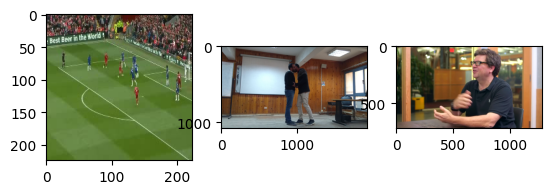

In [ ]:
m.subplot(1,3,1)
m.imshow(fra[0])

m.subplot(1,3,2)
m.imshow(fra[1])

m.subplot(1,3,3)
m.imshow(fra[2])



#**DATA PREPROCESSING**


*   **Extract Frames**
*   **Resize Frames**
*   **integer Divide every pixel of every frame by 255**






In [ ]:
def erid(loc):
  seq_len = 10
  ext_fr = []
  cap = cv2.VideoCapture(loc)
  total_fr = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
  diff = total_fr//seq_len
  for i in range(0 , total_fr , diff):
    cap.set(cv2.CAP_PROP_POS_FRAMES,i)
    ret , fr = cap.read()
    if ret==False:
      break

    resize_fr = cv2.resize(fr, (128,128))
    nor_fr = resize_fr // 255
    # nar = np.array(nor_fr)
    # if len(nor_fr)==seq_len:
    ext_fr.append(np.array(nor_fr))
    cap.release()

  if len(ext_fr) < seq_len:
    ext_fr.extend([np.zeros_like(ext_fr[0])] * (seq_len - len(ext_fr)))
  elif len(ext_fr) > seq_len:
      ext_fr = ext_fr[:seq_len]

  return ext_fr






#**PREPARING INPUTS AND LABELS FOR MODEL**

In [ ]:
def input_prep():
  X ,y = [],[]
  for c , l in zip(Combined["class"] , Combined["location"]):
    preproc_fr = erid(l)
    X.append(preproc_fr)
    y.append(c)


  return X , y

In [ ]:
X  , y = input_prep()

#**DATA SPLITTING**
  **WE WILL SPLIT DATA IN 90 : 10 RATIO AS WE HAVE TAKEN ONLY 60 SAMPLES**

In [ ]:
from sklearn.model_selection import train_test_split

y = pd.get_dummies(y)

xtrain , xtest , ytrain , ytest = train_test_split(X, y , test_size = 0.1 , train_size = 0.9 )


In [ ]:
xtrain = np.array(xtrain) # not runned
xtest = np.array(xtest)

#**MODEL BUILDING**

##**IMPORTING IMPORTANT LIBRARIES**

In [ ]:
from keras.layers import Dropout , Dense , ConvLSTM2D , Flatten , MaxPool3D
from keras import Sequential
from keras.callbacks import EarlyStopping
from keras import regularizers

In [ ]:
def model():
  model = Sequential()

  model.add(ConvLSTM2D(5 , (5,5) , activation = "relu" , return_sequences=True , input_shape= (10, 128,128,3) ))

  model.add(MaxPool3D(   (2,2,2), padding="same" ))

  model.add(Dropout(0.2))

  model.add(ConvLSTM2D(8 , (3,3) , activation="tanh" , return_sequences=True   ,kernel_regularizer=kernel_regularizer.l2(0.03) ))

  model.add(MaxPool3D( (3,3,3), padding="same" ))

  model.add(Dropout(0.5))

  model.add(Flatten())

  model.add(Dense(2 , activation="sigmoid"))

  model.summary()


  return model








In [ ]:
Model  = model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d (ConvLSTM2D)    (None, 10, 124, 124, 5)   4020      
                                                                 
 max_pooling3d (MaxPooling3  (None, 5, 62, 62, 5)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 5, 62, 62, 5)      0         
                                                                 
 conv_lstm2d_1 (ConvLSTM2D)  (None, 5, 60, 60, 8)      3776      
                                                                 
 max_pooling3d_1 (MaxPoolin  (None, 2, 20, 20, 8)      0         
 g3D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 2, 20, 20, 8)      0

In [ ]:
Model.compile(loss="binary_crossentropy" , optimizer="Adam" , metrics=["accuracy"] )

In [ ]:
early = EarlyStopping(monitor="val_loss" , patience = 3 , mode="min" , restore_best_weights=True)
Fitted_model = Model.fit(xtrain , ytrain , batch_size=10 , epochs=50 , validation_split=0.4 , callbacks=[early])

#**LET'S USE MODL TO PREDICT THE CLASS**

In [ ]:
unseen_vid = erid("/content/NV_207.mp4")
print(unseen_vid)

In [ ]:
un = np.array(unseen_vid)
un.shape

(10, 128, 128, 3)

In [ ]:
un = np.expand_dims(un, axis=0)
un.shape

(1, 10, 128, 128, 3)

In [ ]:
predict = Model.predict(un)

1/1 [==============================] - 1s 727ms/step


In [ ]:
predict

array([[0.38786253, 0.61069214]], dtype=float32)

In [ ]:
if predict[0][0]>=0.5:
  print("non_vio")
else:
  print("vio")

vio


In [ ]:
sec = erid("/content/V_175.mp4")
sec = np.array(sec)
sec = np.expand_dims(sec , axis=0)
out = Model.predict(sec)
print(out)
if out[0][0]>=0.5:
  print("non_vio")
else:
  print("vio")


1/1 [==============================] - 0s 360ms/step
[[0.34719566 0.65890783]]
vio


In [ ]:
nv = erid("/content/NV_144.mp4")
nv = np.array(nv)
nv = np.expand_dims(nv , axis=0)
out1 = Model.predict(nv)
print(out1)
if out[0][0]>=0.5:
  print("non_vio")
else:
  print("vio")

1/1 [==============================] - 0s 274ms/step
[[0.39490885 0.602195  ]]
vio


#**EVALUTION OF THE MODEL**
##**TO EVALUATE WE WILL USE**


*   **Accuracy**
*   **Graph of epoch vs validation loss**




In [ ]:
Fitted_model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

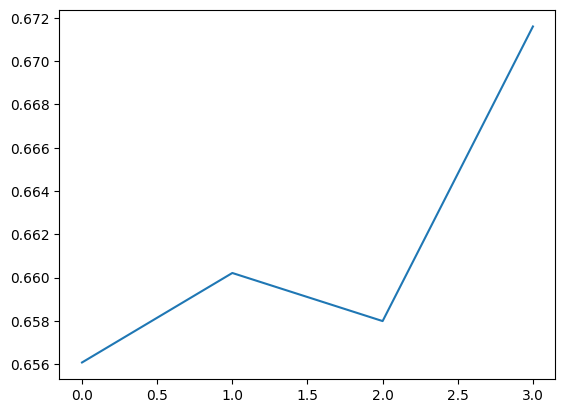

In [ ]:
m.plot(Fitted_model.history["val_loss"])

**AS WE CAN SEE MODEL IS OVERFITTING THEREFORE EARLY STOPPING AND DROPOUT LAYWRS ARE ADDED INT THE MODEL**

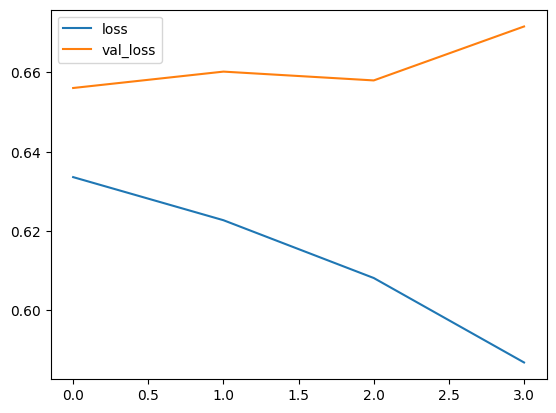

In [ ]:
m.plot(Fitted_model.history["loss"]  , label = "loss")
m.plot(Fitted_model.history["val_loss"] , label = "val_loss")
m.legend()
